##1. Lexicon-Based Sentiment Analysis using NLTK's VADER


In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv')
labelled_dataset=dataset.head(5000).copy()

# Split data into Test Set & Validation Set

#Select first 4000 rows for Test Set
test_set = labelled_dataset.iloc[:4000]

# Select the last 1000 rows for the Validation Set
validation_set = labelled_dataset.iloc[-1000:]


#Filter out irrelevant data
relevant_data_test = test_set[(test_set['Sentiment'].notnull()) & (test_set['Sentiment'] != 'Irrelevant')]
relevant_data_validation = validation_set[(validation_set['Sentiment'].notnull()) & (validation_set['Sentiment'] != 'Irrelevant')]

irrelevant_data=labelled_dataset[(labelled_dataset['Sentiment'].notnull())& (labelled_dataset['Sentiment']=='Irrelevant')]

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on test set
test_sentiments = []

for text in relevant_data_test['text']:
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        test_sentiments.append('Positive')
    elif sentiment_score['compound'] <= -0.05:
        test_sentiments.append('Negative')
    else:
        test_sentiments.append('Neutral')

relevant_data_test['predicted_sentiment']=test_sentiments
# Evaluate accuracy on test set
test_accuracy = sum(1 for x, y in zip(test_sentiments, relevant_data_test['Sentiment']) if x == y) / len(test_sentiments)
print("Test set accuracy:", test_accuracy)

# Generate classification report
report = classification_report(relevant_data_test['predicted_sentiment'], relevant_data_test['Sentiment'])

# Print classification report
print(report)

# Perform sentiment analysis on validation set
validate_sentiments = []

for text in relevant_data_validation['text']:
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        validate_sentiments.append('Positive')
    elif sentiment_score['compound'] <= -0.05:
        validate_sentiments.append('Negative')
    else:
        validate_sentiments.append('Neutral')

relevant_data_validation['predicted_sentiment']=validate_sentiments
# Evaluate accuracy on test set
test_accuracy = sum(1 for x, y in zip(validate_sentiments, relevant_data_validation['Sentiment']) if x == y) / len(validate_sentiments)
print("Validate set accuracy:", test_accuracy)

# Generate classification report
report = classification_report(relevant_data_validation['predicted_sentiment'], relevant_data_validation['Sentiment'])

# Print classification report
print(report)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-d1a8059d971d>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_test['predicted_sentiment']=test_sentiments


Test set accuracy: 0.4878373875374875
              precision    recall  f1-score   support

    Negative       0.67      0.51      0.58      1556
     Neutral       0.23      0.50      0.32       522
    Positive       0.60      0.45      0.51       923

    accuracy                           0.49      3001
   macro avg       0.50      0.49      0.47      3001
weighted avg       0.57      0.49      0.51      3001

Validate set accuracy: 0.4726775956284153
              precision    recall  f1-score   support

    Negative       0.66      0.48      0.55       371
     Neutral       0.23      0.48      0.31       144
    Positive       0.60      0.46      0.52       217

    accuracy                           0.47       732
   macro avg       0.50      0.47      0.46       732
weighted avg       0.56      0.47      0.50       732



<ipython-input-1-d1a8059d971d>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_validation['predicted_sentiment']=validate_sentiments


## 2. Lexicon-based Sentiment Analysis using TextBlob


In [ ]:
from textblob import TextBlob
from sklearn.metrics import classification_report
import pandas as pd

# Load dataset
dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv')
labelled_dataset=dataset.head(5000).copy()

# Split data into Test Set & Validation Set

#Select first 4000 rows for Test Set
test_set = labelled_dataset.iloc[:4000]

# Select the last 1000 rows for the Validation Set
validation_set = labelled_dataset.iloc[-1000:]


#Filter out irrelevant data
relevant_data_test = test_set[(test_set['Sentiment'].notnull()) & (test_set['Sentiment'] != 'Irrelevant')]
relevant_data_validation = validation_set[(validation_set['Sentiment'].notnull()) & (validation_set['Sentiment'] != 'Irrelevant')]

irrelevant_data=labelled_dataset[(labelled_dataset['Sentiment'].notnull())& (labelled_dataset['Sentiment']=='Irrelevant')]

# Perform sentiment analysis on test set using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to test set
relevant_data_test['predicted_sentiment'] = relevant_data_test['text'].apply(get_sentiment)

# Evaluate accuracy
accuracy = (relevant_data_test['Sentiment'] == relevant_data_test['predicted_sentiment']).mean()
print("Accuracy:", accuracy)



# Generate classification report
report = classification_report(relevant_data_test['predicted_sentiment'], relevant_data_test['Sentiment'])

# Print classification report
print(report)

# Perform sentiment analysis on validation set using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to test set
relevant_data_validation['predicted_sentiment'] = relevant_data_validation['text'].apply(get_sentiment)

# Evaluate accuracy
accuracy = (relevant_data_validation['Sentiment'] == relevant_data_validation['predicted_sentiment']).mean()
print("Accuracy:", accuracy)



# Generate classification report
report = classification_report(relevant_data_validation['predicted_sentiment'], relevant_data_validation['Sentiment'])

# Print classification report
print(report)



<ipython-input-29-fd26da2dc9b2>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv')
<ipython-input-29-fd26da2dc9b2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_test['predicted_sentiment'] = relevant_data_test['text'].apply(get_sentiment)


Accuracy: 0.41652782405864713
              precision    recall  f1-score   support

    Negative       0.36      0.54      0.43       794
     Neutral       0.41      0.45      0.43      1046
    Positive       0.52      0.31      0.38      1161

    accuracy                           0.42      3001
   macro avg       0.43      0.43      0.42      3001
weighted avg       0.44      0.42      0.41      3001

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

    Negative       0.38      0.50      0.43       202
     Neutral       0.40      0.47      0.43       251
    Positive       0.51      0.30      0.38       279

    accuracy                           0.42       732
   macro avg       0.43      0.43      0.42       732
weighted avg       0.43      0.42      0.41       732



<ipython-input-29-fd26da2dc9b2>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_validation['predicted_sentiment'] = relevant_data_validation['text'].apply(get_sentiment)


##3. Lexicon-Based Sentiment Analysis using SentiWordNet lexicon

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from sklearn.metrics import classification_report
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')

# Load dataset
dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv')

labelled_dataset=dataset.head(5000).copy()

# Split data into Test Set & Validation Set

#Select first 4000 rows for Test Set
test_set = labelled_dataset.iloc[:4000]

# Select the last 1000 rows for the Validation Set
validation_set = labelled_dataset.iloc[-1000:]


#Filter out irrelevant data
relevant_data_test = test_set[(test_set['Sentiment'].notnull()) & (test_set['Sentiment'] != 'Irrelevant')]
relevant_data_validation = validation_set[(validation_set['Sentiment'].notnull()) & (validation_set['Sentiment'] != 'Irrelevant')]

irrelevant_data=labelled_dataset[(labelled_dataset['Sentiment'].notnull())& (labelled_dataset['Sentiment']=='Irrelevant')]

def get_sentiment_score(word):
    """
    Get the sentiment score (positive, negative, objective) of a word from SentiWordNet.
    """
    # Get all synsets for the word
    synsets = wn.synsets(word)
    if not synsets:
        return None, None, None  # No synsets found for the word

    # Initialize sentiment scores
    positive_score = 0
    negative_score = 0
    objective_score = 0

    # Calculate average sentiment scores for all synsets
    for synset in synsets:
        senti_synset = swn.senti_synset(synset.name())
        positive_score += senti_synset.pos_score()
        negative_score += senti_synset.neg_score()
        objective_score += senti_synset.obj_score()

    # Calculate average scores
    num_synsets = len(synsets)
    positive_score /= num_synsets
    negative_score /= num_synsets
    objective_score /= num_synsets

    return positive_score, negative_score, objective_score

def analyze_sentiment(text):
    """
    Analyze sentiment of a given text using SentiWordNet lexicon.
    """
    tokens = word_tokenize(text)
    num_tokens = len(tokens)
    total_positive_score = 0
    total_negative_score = 0

    for token in tokens:
        # Get sentiment scores for each token
        positive_score, negative_score, _ = get_sentiment_score(token)
        if positive_score is not None and negative_score is not None:
            total_positive_score += positive_score
            total_negative_score += negative_score

    # Calculate average sentiment scores
    if num_tokens > 0:
        average_positive_score = total_positive_score / num_tokens
        average_negative_score = total_negative_score / num_tokens
    else:
        average_positive_score = 0
        average_negative_score = 0

    # Determine overall sentiment
    if average_positive_score > average_negative_score:
        return 'Positive'
    elif average_positive_score < average_negative_score:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to test dataset
relevant_data_test['predicted_sentiment'] = relevant_data_test['text'].apply(analyze_sentiment)

# Calculate accuracy
accuracy = (relevant_data_test['Sentiment'] == relevant_data_test['predicted_sentiment']).mean()

# Output accuracy
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(relevant_data_test['predicted_sentiment'], relevant_data_test['Sentiment'])

# Print classification report
print(report)

# Apply sentiment analysis to validate dataset
relevant_data_validation['predicted_sentiment'] = relevant_data_validation['text'].apply(analyze_sentiment)

# Calculate accuracy
accuracy = (relevant_data_validation['Sentiment'] == relevant_data_validation['predicted_sentiment']).mean()

# Output accuracy
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(relevant_data_validation['predicted_sentiment'], relevant_data_validation['Sentiment'])

# Print classification report
print(report)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
<ipython-input-30-49883f9bb448>:14: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('uk_ru_2023_en_text_random_labeled_dataset_Labelled.csv')
<ipython-input-30-49883f9bb448>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_test['predicted_sentiment'] = relevant_data_test['text'].apply(analyze_sentiment)


Accuracy: 0.3858713762079307
              precision    recall  f1-score   support

    Negative       0.64      0.44      0.52      1723
     Neutral       0.01      0.31      0.01        26
    Positive       0.58      0.32      0.41      1252

    accuracy                           0.39      3001
   macro avg       0.41      0.35      0.31      3001
weighted avg       0.61      0.39      0.47      3001

Accuracy: 0.3729508196721312
              precision    recall  f1-score   support

    Negative       0.65      0.42      0.51       417
     Neutral       0.01      0.18      0.01        11
    Positive       0.58      0.32      0.41       304

    accuracy                           0.37       732
   macro avg       0.41      0.31      0.31       732
weighted avg       0.61      0.37      0.46       732



<ipython-input-30-49883f9bb448>:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_validation['predicted_sentiment'] = relevant_data_validation['text'].apply(analyze_sentiment)


##4. Extract Most Frequent Words in each sentiment to determine the opinions

In [2]:
# Perform sentiment analysis using best lexicon -> VADER on all relevant dataset
relevant_data = labelled_dataset[(labelled_dataset['Sentiment'].notnull()) & (labelled_dataset['Sentiment'] != 'Irrelevant')]
test_sentiments = []


for text in relevant_data['text']:
    sentiment_score = sid.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        test_sentiments.append('Positive')
    elif sentiment_score['compound'] <= -0.05:
        test_sentiments.append('Negative')
    else:
        test_sentiments.append('Neutral')

relevant_data['predicted_sentiment']=test_sentiments

# Create separate DataFrames for each sentiment category

positive_df = relevant_data[relevant_data['predicted_sentiment'] == 'Positive'].copy()
negative_df = relevant_data[relevant_data['predicted_sentiment'] == 'Negative'].copy()
neutral_df = relevant_data[relevant_data['predicted_sentiment'] == 'Neutral'].copy()
irrelevant_df=irrelevant_data[irrelevant_data['Sentiment']=='Irrelevant'].copy()

# Concatenate all text data into a single string
pos_text = ' '.join(positive_df['text'])
neg_text = ' '.join(negative_df['text'])
neu_text = ' '.join(neutral_df['text'])
irr_text = ' '.join(irrelevant_df['text'])

# Tokenize the string into individual words
pos_tokens = word_tokenize(pos_text)
neg_tokens = word_tokenize(neg_text)
neu_tokens = word_tokenize(neu_text)
irr_tokens = word_tokenize(irr_text)

# Create a dictionary to store word frequencies
pos_word_freq = {}
neg_word_freq = {}
neu_word_freq = {}
irr_word_freq = {}

# Filter out stopwords and perform other preprocessing steps if needed
stop_words = set(stopwords.words('english'))
stop_words.update(string.punctuation)
#irrelevant list of words
irr_list=['ukraine','ukrainian','russia','war','russian','russians','ukrainians']

# Count the frequency of each word for positive sentiment
for word in pos_tokens:
    word = word.lower()  # Convert to lowercase
    if word not in stop_words and len(word) >= 6 and word not in irr_list:  # Check if the word is not a stopword
        if word not in pos_word_freq:
            pos_word_freq[word] = 1
        else:
            pos_word_freq[word] += 1

# Count the frequency of each word for negative sentiment
for word in neg_tokens:
    word = word.lower()  # Convert to lowercase
    if word not in stop_words and len(word) >= 5 and word not in irr_list:  # Check if the word is not a stopword
        if word not in neg_word_freq:
            neg_word_freq[word] = 1
        else:
            neg_word_freq[word] += 1

# Count the frequency of each word for neutral sentiment
for word in neu_tokens:
    word = word.lower()  # Convert to lowercase
    if word not in stop_words and len(word) >= 5 and word not in irr_list:  # Check if the word is not a stopword
        if word not in neu_word_freq:
            neu_word_freq[word] = 1
        else:
            neu_word_freq[word] += 1

# Count the frequency of each word for irrelevant text
for word in irr_tokens:
    word = word.lower()  # Convert to lowercase
    if word not in stop_words:  # Check if the word is not a stopword
        if word not in irr_word_freq:
            irr_word_freq[word] = 1
        else:
            irr_word_freq[word] += 1

# Create frequency distributions
pos_fdist = FreqDist(pos_word_freq)
neg_fdist = FreqDist(neg_word_freq)
neu_fdist = FreqDist(neu_word_freq)
irr_fdist = FreqDist(irr_word_freq)

# Get the most common words
pos_common_words = pos_fdist.most_common(30)  # Change 30 to the desired number of most common words
neg_common_words = neg_fdist.most_common(30)
neu_common_words = neu_fdist.most_common(30)
irr_common_words = irr_fdist.most_common(50)

print("Most common words under positive sentiment:")
for word, frequency in pos_common_words:
    print(f"{word}: {frequency}")
print('\n')
print("Most common words under negative sentiment:")
for word, frequency in neg_common_words:
    print(f"{word}: {frequency}")
print('\n')
print("Most common words under neutral sentiment:")
for word, frequency in neu_common_words:
    print(f"{word}: {frequency}")
print('\n')
print("Most common words for irrelevant tweets:")
for word, frequency in irr_common_words:
    print(f"{word}: {frequency}")
print('\n')

<ipython-input-2-28be237c3df6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['predicted_sentiment']=test_sentiments


Most common words under positive sentiment:
support: 133
people: 79
military: 72
forces: 66
defense: 58
president: 56
bakhmut: 51
please: 45
defence: 43
freedom: 41
security: 40
country: 39
intelligence: 38
minister: 34
situation: 30
soldiers: 30
united: 29
states: 29
international: 29
equipment: 28
heroes: 27
special: 26
latest: 26
foreign: 23
soldier: 23
update: 23
russias: 22
helping: 22
training: 22
fighter: 21


Most common words under negative sentiment:
bakhmut: 180
forces: 161
destroyed: 143
people: 139
attack: 131
military: 111
putin: 111
soldiers: 102
killed: 79
fighting: 78
russias: 77
footage: 77
troops: 74
world: 72
region: 72
children: 67
wagner: 65
state: 63
weapons: 60
today: 59
video: 59
president: 58
drone: 56
terrorist: 53
enemy: 53
brigade: 50
tanks: 49
another: 48
battle: 47
crimes: 46


Most common words under neutral sentiment:
forces: 39
military: 33
putin: 31
visit: 28
bakhmut: 26
today: 25
president: 25
region: 21
media: 20
video: 20
wagner: 19
drone: 19
briga

##5a. Positive Word Cloud

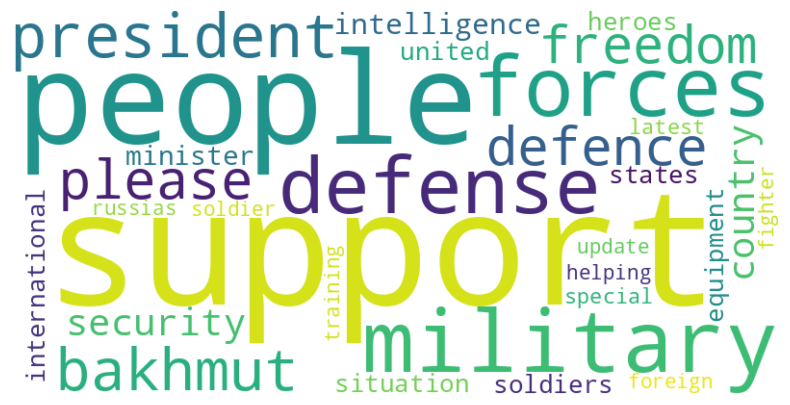

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(pos_common_words))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

##5b. Negative Word Cloud


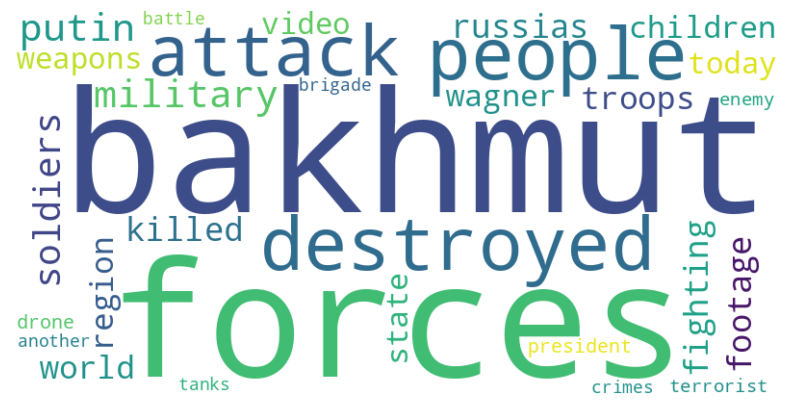

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neg_common_words))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

##5c. Neutral Word Cloud

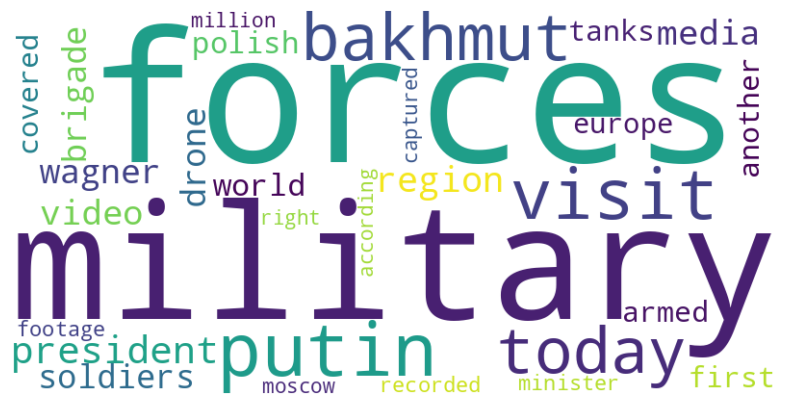

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(neu_common_words))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

##5d. Irrelevant Word Cloud


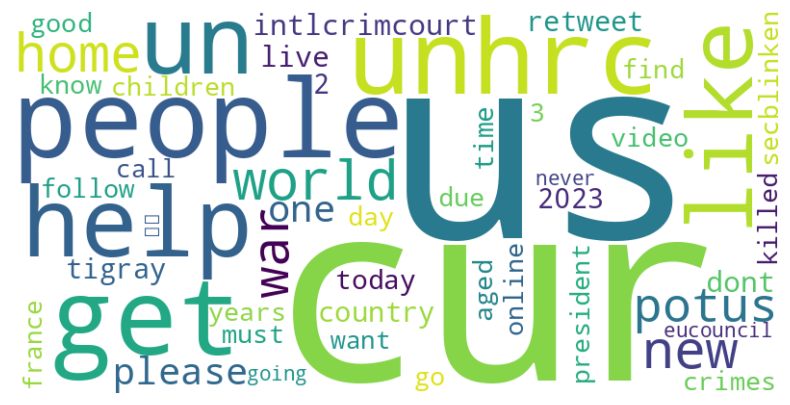

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(irr_common_words))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()